In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib 
!pip install seaborn 
!pip install numpy
!pip install wordcloud
!pip install natasha
!pip install imbalanced-learn
!pip install optuna
!pip install lightgbm
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("dt_razmetka.csv")
dt

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,1,1,спасибо,2025-05-10T18:07:26.873274Z,2945792,54.818,5,Вопрос решен,2025-05-10T18:17:26.495821Z,NaN,NaN,NaN,NaN,NaN
1,2,1,спасибо!,2025-05-10T18:17:33.491488Z,3234340,4.320,5,Вопрос решен,2025-05-10T18:17:33.491488Z,NaN,NaN,NaN,NaN,NaN
2,3,1,Отлично,2025-05-10T18:17:39.232246Z,3380332,3.511,5,Вопрос решен,2025-05-10T18:17:39.232246Z,NaN,NaN,NaN,NaN,NaN
3,4,1,Благодарю за оперативное решение проблемы !,2025-05-10T18:17:52.546168Z,3381812,11.797,5,"{""choices"":[""Нравится скорость отработки заяво...",2025-05-10T18:17:52.546168Z,NaN,NaN,NaN,NaN,NaN
4,5,1,Прекрасный специалист! Побольше таких,2025-05-10T18:18:12.825646Z,3461991,13.906,5,"{""choices"":[""Нравится качество работы сотрудни...",2025-05-10T18:18:12.825646Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2364,1,"долго, но приятно",2025-05-11T01:15:30.134768Z,3507812,4.984,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:33.591664Z,NaN,NaN,NaN,NaN,NaN
2364,2365,1,16.03.2024 г ребята установили кондиционер. ра...,2025-05-11T01:15:46.586738Z,3478532,14.530,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:49.605518Z,NaN,NaN,NaN,NaN,NaN
2365,2366,1,два дня мусоропровод. сегодня с утра тоже,2025-05-11T01:16:02.752642Z,3296403,5.780,5,не относится ни к одному из пунктов,2025-05-11T01:16:02.752642Z,NaN,NaN,NaN,NaN,NaN
2366,2367,1,отрегулировать дверь замки . для должного откр...,2025-05-11T01:16:43.774264Z,3165822,39.637,5,Вопрос решен,2025-05-11T01:16:43.774264Z,NaN,NaN,NaN,NaN,NaN


In [3]:
dt_pr = pd.read_csv("dt_posle_razmetki.csv")
dt_pr

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,1,1,спасибо,2025-05-10T18:07:26.873274Z,2945792,54.818,5,Вопрос решен,2025-05-10T18:17:26.495821Z,NaN,NaN,NaN,NaN,NaN
1,2,1,спасибо!,2025-05-10T18:17:33.491488Z,3234340,4.320,5,Вопрос решен,2025-05-10T18:17:33.491488Z,NaN,NaN,NaN,NaN,NaN
2,3,1,Отлично,2025-05-10T18:17:39.232246Z,3380332,3.511,5,Вопрос решен,2025-05-10T18:17:39.232246Z,NaN,NaN,NaN,NaN,NaN
3,4,1,Благодарю за оперативное решение проблемы !,2025-05-10T18:17:52.546168Z,3381812,11.797,5,"{""choices"":[""Нравится скорость отработки заяво...",2025-05-10T18:17:52.546168Z,NaN,NaN,NaN,NaN,NaN
4,5,1,Прекрасный специалист! Побольше таких,2025-05-10T18:18:12.825646Z,3461991,13.906,5,"{""choices"":[""Нравится качество работы сотрудни...",2025-05-10T18:18:12.825646Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2364,1,"долго, но приятно",2025-05-11T01:15:30.134768Z,3507812,4.984,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:33.591664Z,NaN,NaN,NaN,NaN,NaN
2364,2365,1,16.03.2024 г ребята установили кондиционер. ра...,2025-05-11T01:15:46.586738Z,3478532,14.530,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:49.605518Z,NaN,NaN,NaN,NaN,NaN
2365,2366,1,два дня мусоропровод. сегодня с утра тоже,2025-05-11T01:16:02.752642Z,3296403,5.780,5,не относится ни к одному из пунктов,2025-05-11T01:16:02.752642Z,NaN,NaN,NaN,NaN,NaN
2366,2367,1,отрегулировать дверь замки . для должного откр...,2025-05-11T01:16:43.774264Z,3165822,39.637,5,Вопрос решен,2025-05-11T01:16:43.774264Z,NaN,NaN,NaN,NaN,NaN


In [4]:
dt_pr.columns

Index(['annotation_id', 'annotator', 'comment', 'created_at', 'id',
       'lead_time', 'rating', 'sentiment', 'updated_at', 'Вопрос решен',
       'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников',
       'Нравится скорость отработки заявок', 'Понравилось выполнение заявки'],
      dtype='object')

In [5]:
import ast

# Список целевых категорий
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "не относится ни к одному из пунктов"
]

# Функция для обработки одного значения в столбце sentiment
def parse_sentiment(sentiment_value):
    if isinstance(sentiment_value, str) and '"choices"' in sentiment_value:
        try:
            parsed = ast.literal_eval(sentiment_value)
            return parsed.get("choices", [])
        except Exception as err:
            return f"Ошибка разбора: {err}"
    elif sentiment_value in categories:
        return [sentiment_value]
    return []

# Заполнение меток по категориям
for index, row in dt_pr.iterrows():
    result = parse_sentiment(row.get("sentiment", ""))
    if isinstance(result, list):
        for label in result:
            if label in categories:
                dt_pr.at[index, label] = 1
    elif isinstance(result, str) and result.startswith("Ошибка"):
        print(f"Ошибка в строке {index}: {result}")

dt_pr


,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,не относится ни к одному из пунктов
0,1,1,спасибо,2025-05-10T18:07:26.873274Z,2945792,54.818,5,Вопрос решен,2025-05-10T18:17:26.495821Z,1.0,NaN,NaN,NaN,NaN,NaN
1,2,1,спасибо!,2025-05-10T18:17:33.491488Z,3234340,4.320,5,Вопрос решен,2025-05-10T18:17:33.491488Z,1.0,NaN,NaN,NaN,NaN,NaN
2,3,1,Отлично,2025-05-10T18:17:39.232246Z,3380332,3.511,5,Вопрос решен,2025-05-10T18:17:39.232246Z,1.0,NaN,NaN,NaN,NaN,NaN
3,4,1,Благодарю за оперативное решение проблемы !,2025-05-10T18:17:52.546168Z,3381812,11.797,5,"{""choices"":[""Нравится скорость отработки заяво...",2025-05-10T18:17:52.546168Z,1.0,NaN,NaN,1.0,NaN,NaN
4,5,1,Прекрасный специалист! Побольше таких,2025-05-10T18:18:12.825646Z,3461991,13.906,5,"{""choices"":[""Нравится качество работы сотрудни...",2025-05-10T18:18:12.825646Z,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2364,1,"долго, но приятно",2025-05-11T01:15:30.134768Z,3507812,4.984,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:33.591664Z,1.0,1.0,NaN,NaN,1.0,NaN
2364,2365,1,16.03.2024 г ребята установили кондиционер. ра...,2025-05-11T01:15:46.586738Z,3478532,14.530,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:49.605518Z,1.0,1.0,1.0,NaN,1.0,NaN
2365,2366,1,два дня мусоропровод. сегодня с утра тоже,2025-05-11T01:16:02.752642Z,3296403,5.780,5,не относится ни к одному из пунктов,2025-05-11T01:16:02.752642Z,NaN,NaN,NaN,NaN,NaN,1.0
2366,2367,1,отрегулировать дверь замки . для должного откр...,2025-05-11T01:16:43.774264Z,3165822,39.637,5,Вопрос решен,2025-05-11T01:16:43.774264Z,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
dubl = dt_pr.duplicated().sum()
dubl

0

In [7]:
colum = ['Вопрос решен',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Нравится скорость отработки заявок',
    'Понравилось выполнение заявки',
    'не относится ни к одному из пунктов']
dt_pr[colum] = dt_pr[colum].fillna(0)
dt_pr

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,не относится ни к одному из пунктов
0,1,1,спасибо,2025-05-10T18:07:26.873274Z,2945792,54.818,5,Вопрос решен,2025-05-10T18:17:26.495821Z,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,спасибо!,2025-05-10T18:17:33.491488Z,3234340,4.320,5,Вопрос решен,2025-05-10T18:17:33.491488Z,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,Отлично,2025-05-10T18:17:39.232246Z,3380332,3.511,5,Вопрос решен,2025-05-10T18:17:39.232246Z,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,Благодарю за оперативное решение проблемы !,2025-05-10T18:17:52.546168Z,3381812,11.797,5,"{""choices"":[""Нравится скорость отработки заяво...",2025-05-10T18:17:52.546168Z,1.0,0.0,0.0,1.0,0.0,0.0
4,5,1,Прекрасный специалист! Побольше таких,2025-05-10T18:18:12.825646Z,3461991,13.906,5,"{""choices"":[""Нравится качество работы сотрудни...",2025-05-10T18:18:12.825646Z,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2364,1,"долго, но приятно",2025-05-11T01:15:30.134768Z,3507812,4.984,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:33.591664Z,1.0,1.0,0.0,0.0,1.0,0.0
2364,2365,1,16.03.2024 г ребята установили кондиционер. ра...,2025-05-11T01:15:46.586738Z,3478532,14.530,5,"{""choices"":[""Нравится качество выполнения заяв...",2025-05-11T01:15:49.605518Z,1.0,1.0,1.0,0.0,1.0,0.0
2365,2366,1,два дня мусоропровод. сегодня с утра тоже,2025-05-11T01:16:02.752642Z,3296403,5.780,5,не относится ни к одному из пунктов,2025-05-11T01:16:02.752642Z,0.0,0.0,0.0,0.0,0.0,1.0
2366,2367,1,отрегулировать дверь замки . для должного откр...,2025-05-11T01:16:43.774264Z,3165822,39.637,5,Вопрос решен,2025-05-11T01:16:43.774264Z,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
rd = dt_pr[colum].sum()
rd

Вопрос решен                            2115.0
Нравится качество выполнения заявки      249.0
Нравится качество работы сотрудников     517.0
Нравится скорость отработки заявок       871.0
Понравилось выполнение заявки            288.0
не относится ни к одному из пунктов      235.0
dtype: float64

In [9]:
dt_pr = dt_pr.rename(columns={'не относится ни к одному из пунктов': 'Проблемы'})
dt_pr = dt_pr.drop(['created_at', 'updated_at', 'annotation_id', 'annotator', 'sentiment', 'lead_time','id'], axis=1)

dt_pr

,comment,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Проблемы
0,спасибо,5,1.0,0.0,0.0,0.0,0.0,0.0
1,спасибо!,5,1.0,0.0,0.0,0.0,0.0,0.0
2,Отлично,5,1.0,0.0,0.0,0.0,0.0,0.0
3,Благодарю за оперативное решение проблемы !,5,1.0,0.0,0.0,1.0,0.0,0.0
4,Прекрасный специалист! Побольше таких,5,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2363,"долго, но приятно",5,1.0,1.0,0.0,0.0,1.0,0.0
2364,16.03.2024 г ребята установили кондиционер. ра...,5,1.0,1.0,1.0,0.0,1.0,0.0
2365,два дня мусоропровод. сегодня с утра тоже,5,0.0,0.0,0.0,0.0,0.0,1.0
2366,отрегулировать дверь замки . для должного откр...,5,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
klass_bopr = dt_pr[dt_pr["Вопрос решен"] != 0].copy()

columns_to_drop = [
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)


In [11]:
# Приведение текста к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка от лишних символов (только буквы и пробелы)
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в один список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт частоты слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

# Вывод топ-10 самых частых слов
print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
спасибо: 1314 раз
за: 371 раз
быстро: 355 раз
и: 340 раз
большое: 271 раз
все: 269 раз
оперативно: 257 раз
очень: 174 раз
в: 135 раз
оперативность: 134 раз


In [12]:
# Фильтрация: оставляем только те строки, где указано "Нравится качество выполнения заявки"
klass_bopr = dt_pr[dt_pr["Нравится качество выполнения заявки"] != 0].copy()

# Удаление остальных категорий
columns_to_drop = [
    "Вопрос решен",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# Приведение комментариев к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка текста от всех символов, кроме букв и пробелов
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в один список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт и вывод 10 самых частых слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
спасибо: 137 раз
и: 113 раз
за: 77 раз
быстро: 66 раз
все: 60 раз
оперативно: 42 раз
в: 40 раз
очень: 38 раз
большое: 33 раз
на: 31 раз


In [13]:
# Отбор строк с положительной оценкой работы сотрудников
klass_bopr = dt_pr[dt_pr["Нравится качество работы сотрудников"] != 0].copy()

# Удаление остальных категорий
columns_to_drop = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# Приведение текста комментариев к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка текста: оставляем только буквы и пробелы
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт и вывод самых частых слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
спасибо: 280 раз
и: 174 раз
все: 119 раз
быстро: 118 раз
за: 93 раз
мастер: 86 раз
большое: 79 раз
очень: 72 раз
в: 66 раз
оперативно: 64 раз


In [14]:
# Фильтрация по признаку: "Нравится скорость отработки заявок"
klass_bopr = dt_pr[dt_pr["Нравится скорость отработки заявок"] != 0].copy()

# Удаление неактуальных категорий
columns_to_drop = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# Приведение текста комментариев к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка текста: оставляем только буквы и пробелы
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт и вывод 10 самых частых слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
спасибо: 489 раз
быстро: 318 раз
за: 258 раз
оперативно: 248 раз
и: 245 раз
все: 146 раз
оперативность: 133 раз
очень: 129 раз
большое: 98 раз
в: 80 раз


In [15]:
# Фильтрация по признаку: "Понравилось выполнение заявки"
klass_bopr = dt_pr[dt_pr["Понравилось выполнение заявки"] != 0].copy()

# Удаление неактуальных категорий
columns_to_drop = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# Приведение текста комментариев к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка текста: оставляем только буквы и пробелы
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт и вывод 10 самых частых слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
спасибо: 161 раз
и: 122 раз
за: 84 раз
все: 68 раз
быстро: 67 раз
оперативно: 49 раз
большое: 43 раз
очень: 41 раз
в: 39 раз
качественно: 33 раз


In [16]:
# Фильтрация по признаку: "Понравилось выполнение заявки"
klass_bopr = dt_pr[dt_pr["Проблемы"] != 0].copy()

# Удаление неактуальных категорий
columns_to_drop = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Проблемы"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# Приведение текста комментариев к нижнему регистру
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# Очистка текста: оставляем только буквы и пробелы
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^а-яёa-z\s]", "", x)
)

# Сбор всех слов в список
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# Подсчёт и вывод 10 самых частых слов
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Топ-10 самых частых слов:")
for word, count in top_words:
    print(f"{word}: {count} раз")


Топ-10 самых частых слов:
не: 132 раз
в: 78 раз
и: 56 раз
на: 39 раз
что: 32 раз
за: 29 раз
так: 24 раз
с: 24 раз
по: 24 раз
как: 20 раз


In [17]:
df_train = dt_pr.copy()

df_train.to_csv("train_model.csv", index=False, encoding="utf-8-sig")

df_train

,comment,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Проблемы
0,спасибо,5,1.0,0.0,0.0,0.0,0.0,0.0
1,спасибо!,5,1.0,0.0,0.0,0.0,0.0,0.0
2,Отлично,5,1.0,0.0,0.0,0.0,0.0,0.0
3,Благодарю за оперативное решение проблемы !,5,1.0,0.0,0.0,1.0,0.0,0.0
4,Прекрасный специалист! Побольше таких,5,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2363,"долго, но приятно",5,1.0,1.0,0.0,0.0,1.0,0.0
2364,16.03.2024 г ребята установили кондиционер. ра...,5,1.0,1.0,1.0,0.0,1.0,0.0
2365,два дня мусоропровод. сегодня с утра тоже,5,0.0,0.0,0.0,0.0,0.0,1.0
2366,отрегулировать дверь замки . для должного откр...,5,1.0,0.0,0.0,0.0,0.0,0.0


Проверка проблемной колонки

In [18]:
df_train["Проблемы"].value_counts()


Проблемы
0.0    2133
1.0     235
Name: count, dtype: int64

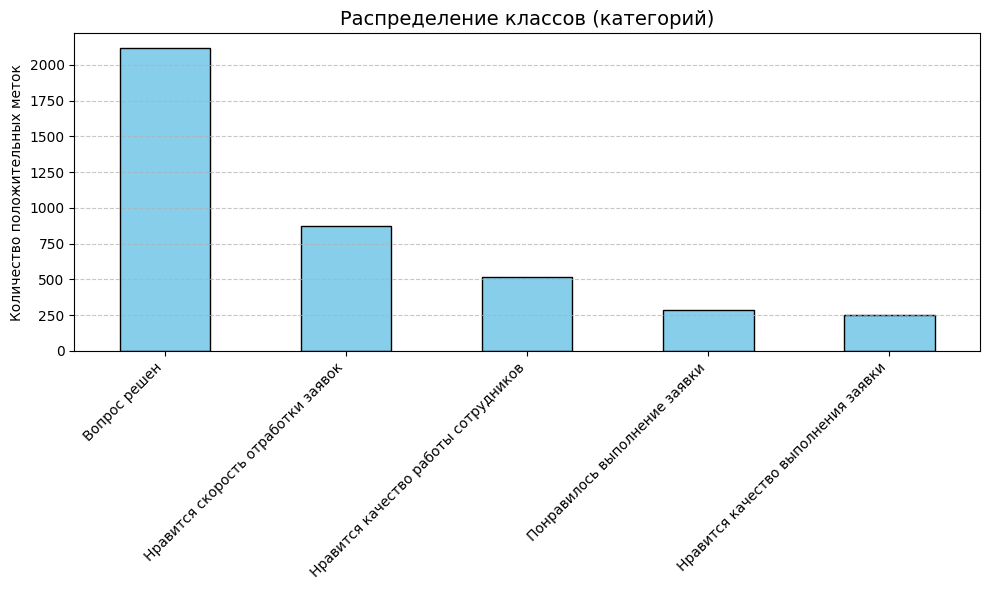

In [19]:
import matplotlib.pyplot as plt

# Категории (как в модели)
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Подсчёт количества меток по категориям
label_counts = df_train[categories].sum().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Распределение классов (категорий)", fontsize=14)
plt.ylabel("Количество положительных меток")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

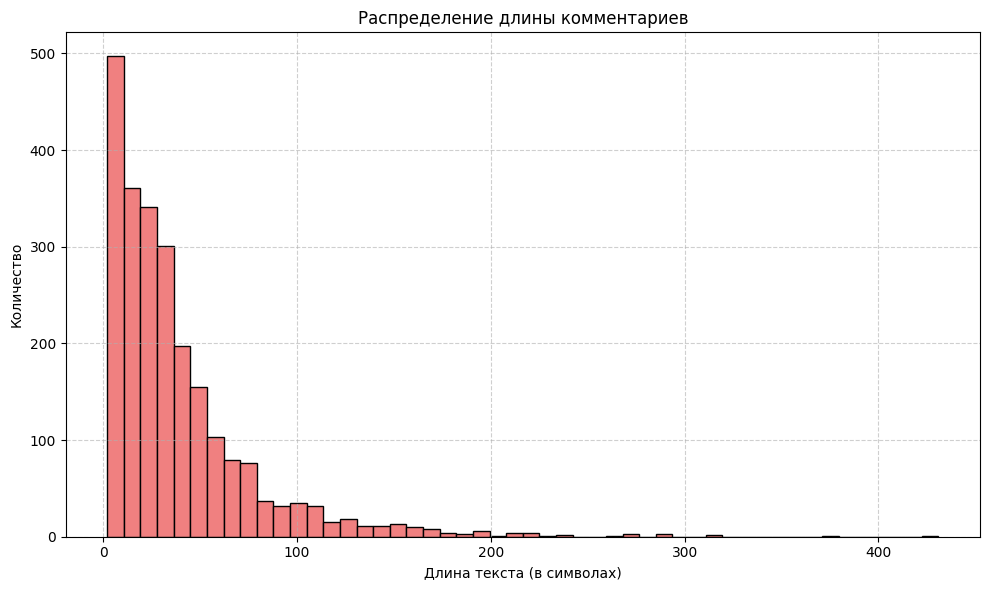

🟢 Самый короткий комментарий:
ок

Длина: 2 символов

--------------------------------------------------------------------------------

🔴 Самый длинный комментарий:
16.03.2024 г ребята установили кондиционер. работа сделана качественно, без лишнего шума, грязи и быстро. михаил (менеджер) ответил на все вопросы, предоставил всю информацию, дал профессиональные советы и отправил прекрасную бригаду: николая (альпинист-монтажник) и сергея - сёма (монтажник- электрик). ребята вежливые, аккуратные, доброжелательные. отличные работники. благодарю за профессионализм и заинтересованность в клиенте!

Длина: 431 символов


In [20]:
# Добавим колонку с длиной текста
df_train["text_length"] = df_train["comment"].astype(str).apply(len)

# Гистограмма длины
plt.figure(figsize=(10, 6))
plt.hist(df_train["text_length"], bins=50, color="lightcoral", edgecolor="black")
plt.title("Распределение длины комментариев")
plt.xlabel("Длина текста (в символах)")
plt.ylabel("Количество")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Находим индекс самого короткого и самого длинного комментария
min_len_idx = df_train["text_length"].idxmin()
max_len_idx = df_train["text_length"].idxmax()

# Самый короткий комментарий
print("🟢 Самый короткий комментарий:")
print(df_train.loc[min_len_idx, "comment"])
print(f"\nДлина: {df_train.loc[min_len_idx, 'text_length']} символов")

print("\n" + "-"*80 + "\n")

# Самый длинный комментарий
print("🔴 Самый длинный комментарий:")
print(df_train.loc[max_len_idx, "comment"])
print(f"\nДлина: {df_train.loc[max_len_idx, 'text_length']} символов")


Корреляция между категориями

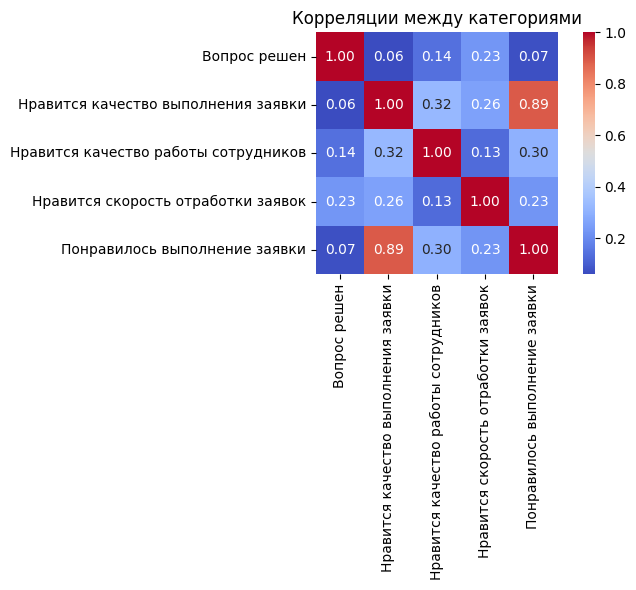

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Корреляционная матрица
corr_matrix = df_train[categories].corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Корреляции между категориями")
plt.tight_layout()
plt.show()


Построение WordCloud по категориям

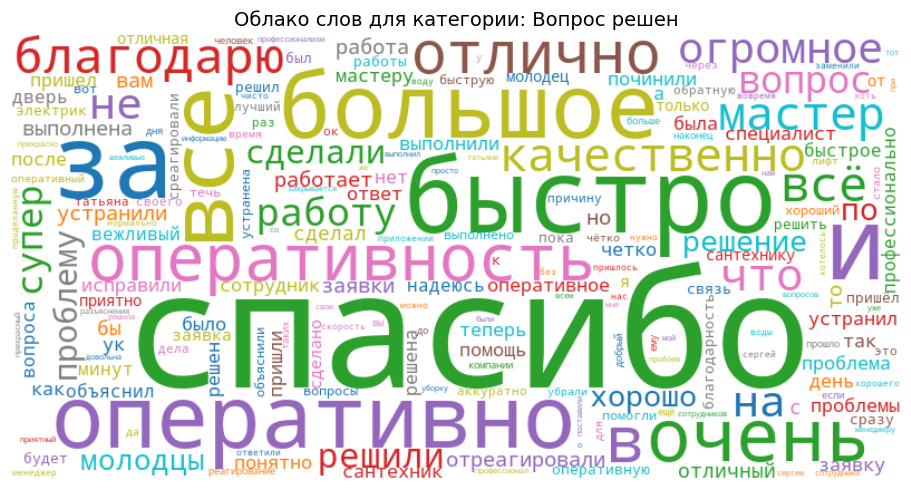

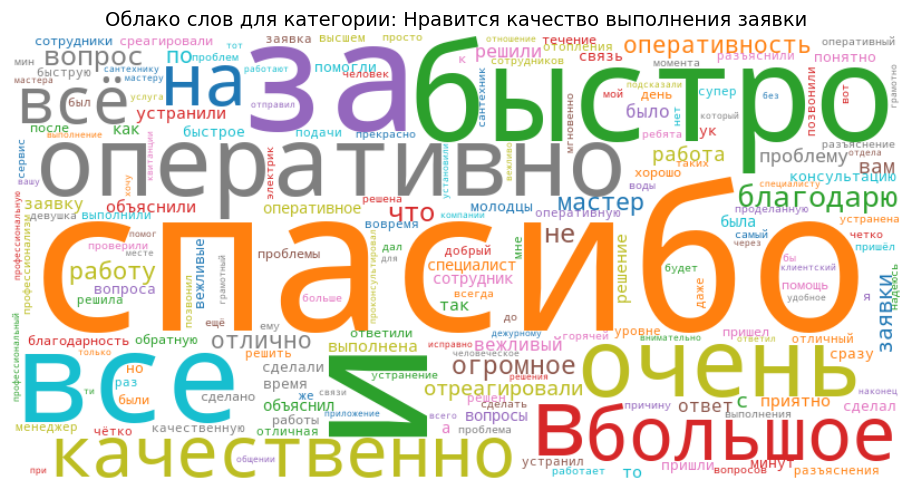

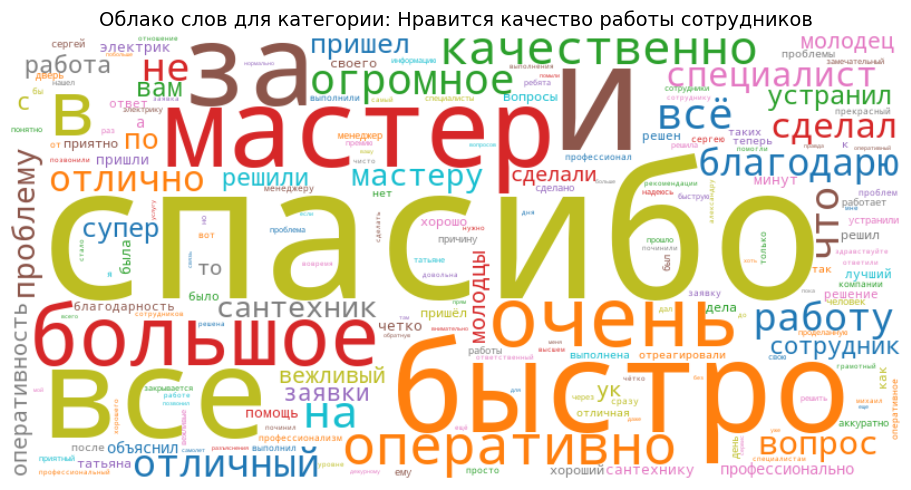

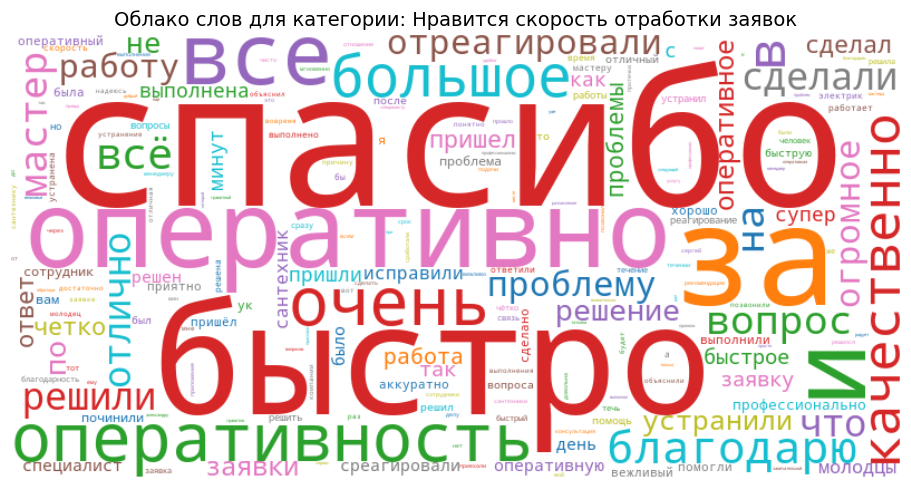

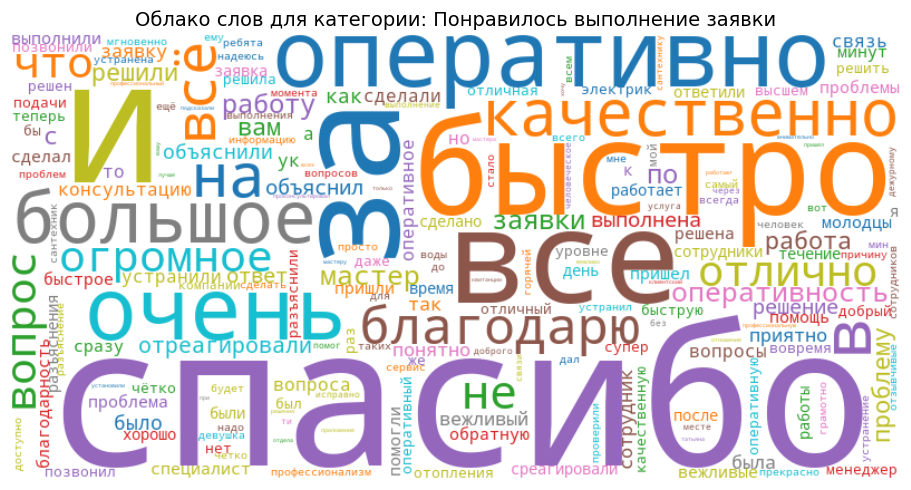

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib
import re

# Настроим отрисовку русских слов
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Предобработка текста — очищаем и разбиваем на слова
def preprocess_for_wordcloud(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)  # убрать пунктуацию
    text = re.sub(r"\d+", " ", text)      # убрать числа
    text = re.sub(r"\s+", " ", text)      # убрать лишние пробелы
    return text.strip()

# Категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Строим WordCloud для каждой категории
for category in categories:
    text = " ".join(df_train[df_train[category] == 1]["comment"].dropna().astype(str))
    text = preprocess_for_wordcloud(text)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="tab10",
        collocations=False 
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Облако слов для категории: {category}", fontsize=14)
    plt.tight_layout()
    plt.show()


1 модель

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
import numpy as np

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Текстовая колонка для обучения
text_column = "comment"  # или "lemmatized", если есть

# Подготовка данных
X = df_train[text_column].fillna("")  # Обработка пропусков
y = df_train[categories]

# Векторизация текста
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Обучение модели
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)

# Предсказание (метки)
y_pred = model.predict(X_test)

# Классификационный отчёт
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

# Samples F1-score
f1_samples = f1_score(y_test, y_pred, average='samples', zero_division=0)
print(f"\nСредний samples F1-score: {f1_samples:.4f}")

# === ROC-AUC расчёт ===
# Получение вероятностей
y_proba = np.array([estimator.predict_proba(X_test)[:, 1] for estimator in model.estimators_]).T

# Расчёт ROC-AUC для каждого класса
roc_auc_scores = []
for i in range(y.shape[1]):
    try:
        score = roc_auc_score(y_test.iloc[:, i], y_proba[:, i])
    except ValueError:
        score = np.nan  # Класс может отсутствовать в тестовой выборке
    roc_auc_scores.append(score)

# Вывод результатов по категориям
print("\nROC-AUC по категориям:")
for cat, score in zip(categories, roc_auc_scores):
    print(f"{cat}: ROC-AUC = {score:.4f}")

# Среднее значение ROC-AUC
mean_roc_auc = np.nanmean(roc_auc_scores)
print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")


                                      precision    recall  f1-score   support

                        Вопрос решен       0.99      0.89      0.94       432
 Нравится качество выполнения заявки       0.26      0.48      0.34        48
Нравится качество работы сотрудников       0.56      0.62      0.59       107
  Нравится скорость отработки заявок       0.91      0.85      0.88       189
       Понравилось выполнение заявки       0.27      0.47      0.35        59

                           micro avg       0.76      0.80      0.78       835
                           macro avg       0.60      0.66      0.62       835
                        weighted avg       0.83      0.80      0.81       835
                         samples avg       0.74      0.77      0.73       835


Средний samples F1-score: 0.7289

ROC-AUC по категориям:
Вопрос решен: ROC-AUC = 0.9649
Нравится качество выполнения заявки: ROC-AUC = 0.7916
Нравится качество работы сотрудников: ROC-AUC = 0.8503
Нравится скорость о

Слабовато, пробуем дальше

2 Рандом форест

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
import numpy as np

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Текстовая колонка для обучения
text_column = "comment"  # можно заменить на "lemmatized"

# Подготовка данных
X = df_train[text_column].fillna("")  # Обработка пропусков
y = df_train[categories]

# Векторизация текста
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Обучение модели
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

# Предсказание (метки)
y_pred = model.predict(X_test)

# Классификационный отчёт
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

# Samples F1-score
f1_samples = f1_score(y_test, y_pred, average='samples', zero_division=0)
print(f"\nСредний samples F1-score: {f1_samples:.4f}")

# === ROC-AUC расчёт ===
# Получение вероятностей
y_proba = np.array([estimator.predict_proba(X_test)[:, 1] for estimator in model.estimators_]).T

# Расчёт ROC-AUC для каждого класса
roc_auc_scores = []
for i in range(y.shape[1]):
    try:
        score = roc_auc_score(y_test.iloc[:, i], y_proba[:, i])
    except ValueError:
        score = np.nan  # Один из классов отсутствует
    roc_auc_scores.append(score)

# Вывод по классам
print("\nROC-AUC по категориям:")
for cat, score in zip(categories, roc_auc_scores):
    print(f"{cat}: ROC-AUC = {score:.4f}")

# Среднее значение ROC-AUC
mean_roc_auc = np.nanmean(roc_auc_scores)
print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")


                                      precision    recall  f1-score   support

                        Вопрос решен       0.97      0.97      0.97       432
 Нравится качество выполнения заявки       0.38      0.06      0.11        48
Нравится качество работы сотрудников       0.82      0.48      0.60       107
  Нравится скорость отработки заявок       0.92      0.82      0.87       189
       Понравилось выполнение заявки       0.33      0.05      0.09        59

                           micro avg       0.93      0.76      0.83       835
                           macro avg       0.68      0.48      0.53       835
                        weighted avg       0.86      0.76      0.79       835
                         samples avg       0.86      0.78      0.79       835


Средний samples F1-score: 0.7944

ROC-AUC по категориям:
Вопрос решен: ROC-AUC = 0.9718
Нравится качество выполнения заявки: ROC-AUC = 0.8254
Нравится качество работы сотрудников: ROC-AUC = 0.8822
Нравится скорость о

3 Рандом форест с кросс-валидацией

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, roc_auc_score
import numpy as np

# Параметры
n_splits = 5
random_state = 42
text_column = "comment"  # или "lemmatized"

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Данные
X = df_train[text_column]
y = df_train[categories]

# Векторизация
vectorizer = TfidfVectorizer(max_features=5000)

# Кросс-валидация
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
all_f1_scores = []
all_roc_auc_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train_text, X_test_text = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec = vectorizer.transform(X_test_text)

    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
    model = MultiOutputClassifier(rf)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    print(f"\n=== Fold {fold} ===")
    print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

    # F1-score по samples
    f1 = f1_score(y_test, y_pred, average="samples", zero_division=0)
    all_f1_scores.append(f1)
    print(f"Samples F1-score: {f1:.4f}")

    # ROC-AUC
    # Получаем вероятности
    y_proba = np.array([estimator.predict_proba(X_test_vec)[:, 1] for estimator in model.estimators_]).T

    # ROC-AUC по каждому лейблу
    roc_auc_per_label = []
    for i in range(y_test.shape[1]):
        try:
            score = roc_auc_score(y_test.iloc[:, i], y_proba[:, i])
        except ValueError:
            score = np.nan  # если один из классов отсутствует
        roc_auc_per_label.append(score)

    # Среднее по меткам
    fold_mean_roc_auc = np.nanmean(roc_auc_per_label)
    all_roc_auc_scores.append(fold_mean_roc_auc)
    print(f"Mean ROC-AUC: {fold_mean_roc_auc:.4f}")

# Средние метрики по всем фолдам
print(f"\nСредний samples F1-score по {n_splits} фолдам: {np.mean(all_f1_scores):.4f}")
print(f"Средний ROC-AUC по {n_splits} фолдам: {np.nanmean(all_roc_auc_scores):.4f}")



=== Fold 1 ===
                                      precision    recall  f1-score   support

                        Вопрос решен       0.97      0.96      0.97       432
 Нравится качество выполнения заявки       0.50      0.12      0.20        48
Нравится качество работы сотрудников       0.82      0.50      0.62       107
  Нравится скорость отработки заявок       0.92      0.85      0.88       189
       Понравилось выполнение заявки       0.27      0.05      0.09        59

                           micro avg       0.93      0.77      0.84       835
                           macro avg       0.70      0.50      0.55       835
                        weighted avg       0.86      0.77      0.80       835
                         samples avg       0.85      0.78      0.79       835

Samples F1-score: 0.7911
Mean ROC-AUC: 0.8858

=== Fold 2 ===
                                      precision    recall  f1-score   support

                        Вопрос решен       0.95      0.99   

Пробуем другие модели

4 Oversampling для редких классов + Добавление новых признаков

In [40]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re

# --- Кастомный трансформер ---
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# --- Параметры ---
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]
X = df_train["comment"].fillna("")
y = df_train[categories]

# --- Кросс-валидация ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_f1_scores = []
all_roc_auc_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\n--- Fold {fold} ---")

    # Подготовка данных
    X_train_raw, X_val_raw = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train_raw)
    X_val_tfidf = tfidf.transform(X_val_raw)

    # Доп. признаки
    stats = TextStatsExtractor()
    X_train_stats = StandardScaler().fit_transform(stats.fit_transform(X_train_raw))
    X_val_stats = StandardScaler().fit_transform(stats.transform(X_val_raw))

    # Комбинация признаков
    X_train_combined = hstack([X_train_tfidf, csr_matrix(X_train_stats)])
    X_val_combined = hstack([X_val_tfidf, csr_matrix(X_val_stats)])

    # Oversampling
    y_sum = y_train.sum(axis=1)
    ros = RandomOverSampler(random_state=42)
    X_train_combined_ros, y_sum_ros = ros.fit_resample(X_train_combined, y_sum)
    
    # Важно: пересобираем метки y после ресемплинга
    y_train_ros = y_train.iloc[ros.sample_indices_]

    # Обучение
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
    model = MultiOutputClassifier(rf)
    model.fit(X_train_combined_ros, y_train_ros)

    # Предсказание
    y_pred = model.predict(X_val_combined)
    y_proba = np.array([estimator.predict_proba(X_val_combined)[:, 1] for estimator in model.estimators_]).T

    # F1
    f1 = f1_score(y_val, y_pred, average="samples", zero_division=0)
    all_f1_scores.append(f1)
    print(f"Samples F1-score: {f1:.4f}")

    # ROC-AUC
    roc_auc_fold = []
    for i in range(y.shape[1]):
        try:
            score = roc_auc_score(y_val.iloc[:, i], y_proba[:, i])
        except ValueError:
            score = np.nan
        roc_auc_fold.append(score)

    mean_roc_auc = np.nanmean(roc_auc_fold)
    all_roc_auc_scores.append(mean_roc_auc)
    print(f"Mean ROC-AUC: {mean_roc_auc:.4f}")

# --- Общий результат ---
print("\n==== Результаты кросс-валидации ====")
print(f"Средний Samples F1-score: {np.mean(all_f1_scores):.4f}")
print(f"Средний ROC-AUC: {np.mean(all_roc_auc_scores):.4f}")



--- Fold 1 ---
Samples F1-score: 0.7984
Mean ROC-AUC: 0.8854

--- Fold 2 ---
Samples F1-score: 0.7923
Mean ROC-AUC: 0.8741

--- Fold 3 ---
Samples F1-score: 0.7748
Mean ROC-AUC: 0.9044

--- Fold 4 ---
Samples F1-score: 0.7584
Mean ROC-AUC: 0.8698

--- Fold 5 ---
Samples F1-score: 0.7917
Mean ROC-AUC: 0.8794

==== Результаты кросс-валидации ====
Средний Samples F1-score: 0.7831
Средний ROC-AUC: 0.8826


5 Пробую Logistic Regression с MultiOutputClassifier для многометочной классификации

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re

# Кастомный трансформер для дополнительных фич
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# Категории для предсказания
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Данные
X = df_train["comment"]
y = df_train[categories]

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Дополнительные числовые признаки
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# Объединяем sparse TF-IDF и dense признаки
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# Разбиваем на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Обучаем Logistic Regression с MultiOutputClassifier
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1))
model.fit(X_train, y_train)

# Предсказание и F1-оценка
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")

# Предсказание вероятностей
y_probs = model.predict_proba(X_test)
y_probs_matrix = np.array([prob[:, 1] for prob in y_probs]).T  # вероятности положительного класса

# ROC-AUC по каждому классу
roc_auc_scores = {}
for i, cat in enumerate(categories):
    try:
        roc_auc = roc_auc_score(y_test.iloc[:, i], y_probs_matrix[:, i])
    except ValueError:
        roc_auc = np.nan  # если только один класс
    roc_auc_scores[cat] = roc_auc

# Средний ROC-AUC
mean_roc_auc = np.nanmean(list(roc_auc_scores.values()))

# Вывод
print("\nROC-AUC по категориям:")
for cat, score in roc_auc_scores.items():
    print(f"{cat}: {score:.4f}" if not np.isnan(score) else f"{cat}: ROC-AUC не рассчитывается (один класс)")

print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")


                                      precision    recall  f1-score   support

                        Вопрос решен       0.99      0.90      0.94       432
 Нравится качество выполнения заявки       0.24      0.50      0.33        48
Нравится качество работы сотрудников       0.57      0.64      0.61       107
  Нравится скорость отработки заявок       0.90      0.85      0.88       189
       Понравилось выполнение заявки       0.28      0.49      0.36        59

                           micro avg       0.75      0.80      0.78       835
                           macro avg       0.60      0.68      0.62       835
                        weighted avg       0.83      0.80      0.81       835
                         samples avg       0.74      0.77      0.73       835

Samples F1-score: 0.7344

ROC-AUC по категориям:
Вопрос решен: 0.9564
Нравится качество выполнения заявки: 0.7852
Нравится качество работы сотрудников: 0.8502
Нравится скорость отработки заявок: 0.9601
Понравилось вып

результат не нравится, идем дальше

6 LightGBM

In [32]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re

# Кастомный трансформер для доп. признаков
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Данные
X = df_train["comment"]
y = df_train[categories]

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Доп. числовые признаки
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# Объединяем sparse и dense признаки
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Инициализация LightGBM классификатора
lgbm = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Обертка MultiOutputClassifier
model = MultiOutputClassifier(lgbm)

# Обучение
model.fit(X_train, y_train)

# Предсказание классов
y_pred = model.predict(X_test)

# Предсказание вероятностей
y_probs = model.predict_proba(X_test)
y_probs_matrix = np.array([prob[:, 1] for prob in y_probs]).T  # вероятности положительного класса

# Отчёт и F1
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")

# ROC-AUC по каждому классу
roc_auc_scores = {}
for i, cat in enumerate(categories):
    try:
        roc_auc = roc_auc_score(y_test.iloc[:, i], y_probs_matrix[:, i])
    except ValueError:
        roc_auc = np.nan  # если один класс, метрика не считается
    roc_auc_scores[cat] = roc_auc

# Среднее значение
mean_roc_auc = np.nanmean(list(roc_auc_scores.values()))

# Вывод
print("\nROC-AUC по категориям:")
for cat, score in roc_auc_scores.items():
    print(f"{cat}: {score:.4f}" if not np.isnan(score) else f"{cat}: ROC-AUC не рассчитывается (один класс)")

print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")


                                      precision    recall  f1-score   support

                        Вопрос решен       0.98      0.93      0.96       432
 Нравится качество выполнения заявки       0.39      0.35      0.37        48
Нравится качество работы сотрудников       0.60      0.54      0.57       107
  Нравится скорость отработки заявок       0.90      0.86      0.88       189
       Понравилось выполнение заявки       0.30      0.27      0.29        59

                           micro avg       0.84      0.79      0.81       835
                           macro avg       0.63      0.59      0.61       835
                        weighted avg       0.83      0.79      0.81       835
                         samples avg       0.79      0.77      0.76       835

Samples F1-score: 0.7616

ROC-AUC по категориям:
Вопрос решен: 0.9539
Нравится качество выполнения заявки: 0.8125
Нравится качество работы сотрудников: 0.8434
Нравится скорость отработки заявок: 0.9519
Понравилось вып

Норм, улучшаем модель

7 Добавил Optuna, оптимизация по средней F1-score по всем категориям и признаки TF-IDF

In [31]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re
import optuna

# Кастомный трансформер для доп. признаков
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Данные
X = df_train["comment"]
y = df_train[categories]

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Доп. числовые признаки
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# Объединяем sparse и dense признаки
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# Функция-цель для Optuna
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'f1',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'random_state': 42,
        'n_jobs': -1,
        'class_weight': 'balanced',
        'n_estimators': 200
    }
    
    scores = []
    for label in categories:
        model = lgb.LGBMClassifier(**param)
        score = cross_val_score(model, X_combined, y[label], cv=3, scoring='f1', n_jobs=-1).mean()
        scores.append(score)
    return np.mean(scores)

# Оптимизация гиперпараметров
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Лучшие параметры:", study.best_params)

# Обучение финальной модели
best_params = study.best_params
best_params.update({
    'objective': 'binary',
    'metric': 'f1',
    'verbosity': -1,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced',
    'n_estimators': 200
})

final_model = MultiOutputClassifier(lgb.LGBMClassifier(**best_params))

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Обучение модели
final_model.fit(X_train, y_train)

# Предсказания
y_pred = final_model.predict(X_test)

# Оценка F1
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")

# ROC-AUC расчёт
y_probs = final_model.predict_proba(X_test)
y_probs_matrix = np.array([probs[:, 1] for probs in y_probs]).T

roc_auc_per_class = {}
for i, cat in enumerate(categories):
    try:
        score = roc_auc_score(y_test.iloc[:, i], y_probs_matrix[:, i])
    except ValueError:
        score = np.nan
    roc_auc_per_class[cat] = score

mean_roc_auc = np.nanmean(list(roc_auc_per_class.values()))

print("\nROC-AUC по категориям:")
for cat, score in roc_auc_per_class.items():
    print(f"{cat}: {score:.4f}")
print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")


[I 2025-05-18 19:27:57,180] A new study created in memory with name: no-name-259aede0-494e-4339-b128-1ae44cd944ea
[I 2025-05-18 19:28:01,995] Trial 0 finished with value: 0.6090728611973002 and parameters: {'num_leaves': 80, 'max_depth': 7, 'learning_rate': 0.0814084036746475, 'min_child_samples': 17, 'feature_fraction': 0.9852520191713473, 'bagging_fraction': 0.9678307214392324, 'bagging_freq': 5}. Best is trial 0 with value: 0.6090728611973002.
[I 2025-05-18 19:28:03,775] Trial 1 finished with value: 0.6080206831618182 and parameters: {'num_leaves': 30, 'max_depth': 9, 'learning_rate': 0.08130646795366366, 'min_child_samples': 11, 'feature_fraction': 0.9489324284086054, 'bagging_fraction': 0.7635956589253194, 'bagging_freq': 9}. Best is trial 0 with value: 0.6090728611973002.
[I 2025-05-18 19:28:05,425] Trial 2 finished with value: 0.6278308757226239 and parameters: {'num_leaves': 47, 'max_depth': 7, 'learning_rate': 0.05346266951956995, 'min_child_samples': 6, 'feature_fraction': 0.

Лучшие параметры: {'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.0427214854700318, 'min_child_samples': 7, 'feature_fraction': 0.7357948960709505, 'bagging_fraction': 0.931072112439771, 'bagging_freq': 2}
                                      precision    recall  f1-score   support

                        Вопрос решен       0.99      0.93      0.96       432
 Нравится качество выполнения заявки       0.29      0.48      0.37        48
Нравится качество работы сотрудников       0.59      0.65      0.62       107
  Нравится скорость отработки заявок       0.91      0.85      0.88       189
       Понравилось выполнение заявки       0.29      0.41      0.34        59

                           micro avg       0.79      0.81      0.80       835
                           macro avg       0.61      0.66      0.63       835
                        weighted avg       0.83      0.81      0.82       835
                         samples avg       0.77      0.78      0.76       835

Samp

RandomForest с Oversampling для редких классов + Добавление новых признаков оказалась самая лучшая модель

Сохраним модель 4

In [42]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import re
import joblib
from scipy.sparse import hstack, csr_matrix

# Кастомный трансформер для дополнительных фич
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# Целевые категории
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки"
]

# Данные
X = df_train["comment"]
y = df_train[categories]

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Числовые признаки
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
scaler = StandardScaler()
X_stats = scaler.fit_transform(X_stats)

# Объединение
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Oversampling
ros = RandomOverSampler(random_state=42)
y_train_sum = y_train.sum(axis=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train_sum)

# Модель
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
f1 = f1_score(y_test, y_pred, average="samples", zero_division=0)
print(f"Samples F1-score: {f1:.4f}")

# ROC-AUC
y_probs = model.predict_proba(X_test)
y_probs_matrix = np.array([probs[:, 1] for probs in y_probs]).T  # (n_samples, n_classes)

roc_auc_per_class = {}
for i, cat in enumerate(categories):
    try:
        score = roc_auc_score(y_test.iloc[:, i], y_probs_matrix[:, i])
    except ValueError:
        score = np.nan  # если один класс — ROC AUC не считается
    roc_auc_per_class[cat] = score

mean_roc_auc = np.nanmean(list(roc_auc_per_class.values()))

print("\nROC-AUC по категориям:")
for cat, score in roc_auc_per_class.items():
    print(f"{cat}: {score:.4f}")
print(f"\nСредний ROC-AUC: {mean_roc_auc:.4f}")

# Сохранение моделей
joblib.dump(model, "model.pkl")
joblib.dump(tfidf, "tfidf.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(text_stats, "stats.pkl")


                                      precision    recall  f1-score   support

                        Вопрос решен       0.97      0.97      0.97       432
 Нравится качество выполнения заявки       0.50      0.08      0.14        48
Нравится качество работы сотрудников       0.73      0.53      0.62       107
  Нравится скорость отработки заявок       0.92      0.83      0.87       189
       Понравилось выполнение заявки       0.62      0.08      0.15        59

                           micro avg       0.92      0.77      0.84       835
                           macro avg       0.75      0.50      0.55       835
                        weighted avg       0.88      0.77      0.80       835
                         samples avg       0.85      0.78      0.80       835

Samples F1-score: 0.7959

ROC-AUC по категориям:
Вопрос решен: 0.9652
Нравится качество выполнения заявки: 0.8338
Нравится качество работы сотрудников: 0.8803
Нравится скорость отработки заявок: 0.9563
Понравилось вып

['stats.pkl']